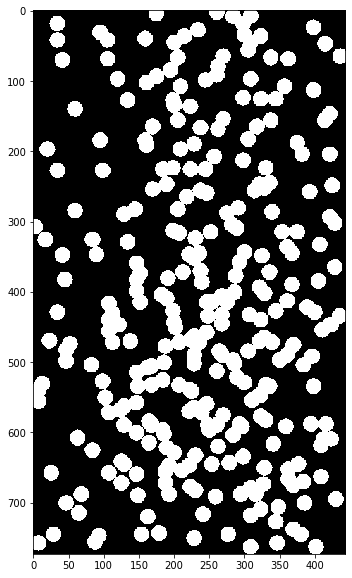

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


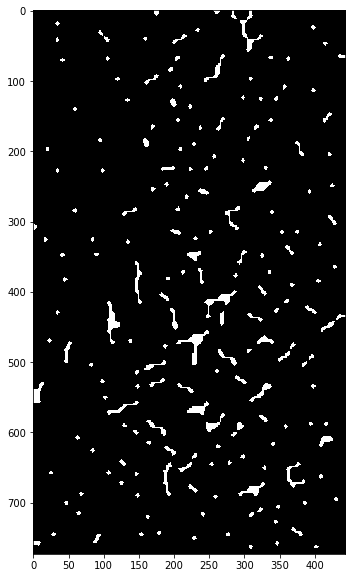

[[64, 443], [65, 443], [66, 443], [67, 443], [303, 0], [304, 0], [305, 0], [306, 0], [307, 0], [308, 0], [309, 0], [310, 0], [311, 0], [312, 0], [434, 443], [435, 443], [538, 0], [539, 0], [540, 0], [541, 0], [542, 0], [543, 0], [544, 0], [545, 0], [546, 0], [547, 0], [548, 0], [549, 0], [550, 0], [551, 0], [552, 0], [553, 0], [554, 0], [555, 0], [556, 0], [557, 0], [755, 0], [756, 0], [757, 0], [758, 0], [759, 0], [0, 171], [0, 172], [0, 173], [0, 174], [0, 175], [0, 176], [0, 177], [0, 178], [0, 256], [0, 257], [0, 258], [0, 259], [0, 260], [0, 261], [0, 262], [0, 263], [0, 264], [0, 282], [0, 283], [0, 284], [0, 307], [0, 308], [0, 309]]


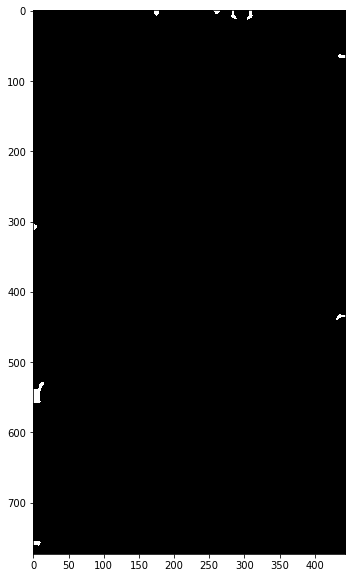

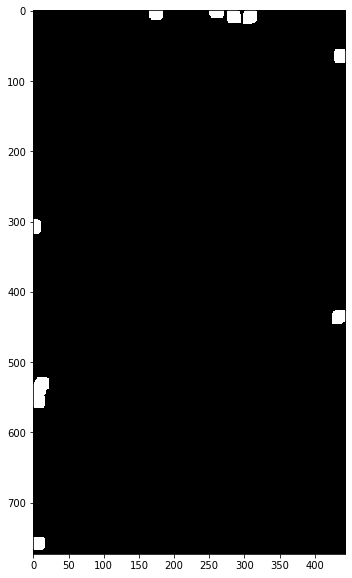

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import flood, flood_fill

def recursive(out,i,j,x,y,coins):
    #print(i,j)
    if out[i][j]==coins[i][j]:
        return out
    out[i][j] = coins[i][j]
    a = []
    b = []
    if i==0:
        a.append(i+1)
    elif i==x-1:
        a.append(i-1)
    else:
        a.append(i-1)
        a.append(i+1)
    if j==0:
        b.append(j+1)
    elif j==y-1:
        b.append(j-1)
    else:
        b.append(j-1)
        b.append(j+1)
    for k in range(len(a)):
        for l in range(len(b)):
            if coins[a[k]][b[l]]==1:
                out = recursive(out,a[k],b[l],x,y,coins)
    return out

def only_coins_touching_boundary(coins):
    t_p = []
    for i in range(0,coins.shape[0]):
        if(coins[i][0]==1):
            t_p.append([i,0])
        if(coins[i][coins.shape[1]-1]==1):
            t_p.append([i,coins.shape[1]-1])
    for i in range(1,coins.shape[1]-1):
        if(coins[0][i]==1):
            t_p.append([0,i])
        if(coins[coins.shape[0]-1][i]==1):
            t_p.append([coins.shape[0]-1,i])
    print(t_p)
    x = coins.shape[0]
    y = coins.shape[1]
    out = np.zeros(coins.shape)
    for i in range(len(t_p)):
        out = recursive(out,t_p[i][0],t_p[i][1],x,y,coins)
    return out

coins = cv2.imread("../input_data/coins.jpg",0)
new = np.copy(coins)
coins[new<127] = 0
coins[new>126] = 1
plt.figure(figsize=(10,10))
plt.imshow(coins,cmap="gray")
plt.show()
# print(coins.shape[0]*coins.shape[1])
# print(np.count_nonzero(coins==0)+np.count_nonzero(coins==1))
kernel = np.array([[0,0,0,0,0],[0,1,1,1,0],[0,1,1,1,0],[0,1,1,1,0],[0,0,0,0,0]],dtype=np.uint8)
print(kernel)
eroded = cv2.erode(coins,kernel,iterations=6)
plt.figure(figsize=(10,10))
plt.imshow(eroded,cmap="gray")
plt.show() 
boundary = only_coins_touching_boundary(eroded)
plt.figure(figsize=(10,10))
plt.imshow(boundary,cmap="gray")
plt.show() 
dilated = cv2.dilate(boundary,kernel,iterations=6)
plt.figure(figsize=(10,10))
plt.imshow(dilated,cmap="gray")
plt.show() 